In [1]:
#ignoring the warnings since tensor flow will give  a lot of them
import warnings
warnings.filterwarnings("ignore")

# Importing all libraries
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
import pickle

In [3]:
#Load data from pickle files we stored before
pickle_in=open("x_train.pickle","rb")
x_train=pickle.load(pickle_in)

pickle_in=open("y_train.pickle","rb")
y_train=pickle.load(pickle_in)

pickle_in=open("x_test.pickle","rb")
x_test=pickle.load(pickle_in)

pickle_in=open("y_test.pickle","rb")
y_test=pickle.load(pickle_in)

pickle_in=open("x_val.pickle","rb")
x_val=pickle.load(pickle_in)

pickle_in=open("y_val.pickle","rb")
y_val=pickle.load(pickle_in)

In [4]:
# Normalize the data. For pixel data max value of x is 255.0

x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

In [5]:
# CNN Model Creation

In [6]:
# Importing TensorBoard
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard
import time

Name="Pnemonia-{}".format(int(time.time())) #This will add different time stamps as we run the model
tb=TensorBoard()

In [7]:
#If we are running a big algorithm or many algorithms, we can use this so that each algorithm uses 1/3rd of the RAM only

gpu_options= tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess= tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [29]:
# Creating the model
model = Sequential()

# Adding first layer

model.add(Conv2D(128,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 79, 79, 128)       640       
_________________________________________________________________
activation_16 (Activation)   (None, 79, 79, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Adding second layer

model.add(Conv2D(64,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 79, 79, 128)       640       
_________________________________________________________________
activation_16 (Activation)   (None, 79, 79, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_17 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25, 25, 64)       

In [31]:
# Adding third layer

model.add(Conv2D(64,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 79, 79, 128)       640       
_________________________________________________________________
activation_16 (Activation)   (None, 79, 79, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_17 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25, 25, 64)       

In [32]:
# Adding fourth layer

model.add(Conv2D(64,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'max_pooling2d_13/MaxPool' (op: 'MaxPool') with input shapes: [?,1,1,64].

In [33]:
# We now follow the process followed in a normal neural network

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(rate=0.20))

# Final Layer
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 79, 79, 128)       640       
_________________________________________________________________
activation_16 (Activation)   (None, 79, 79, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_17 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25, 25, 64)       

In [34]:
# Compiling CNN Model

In [38]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
#sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#rms=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
#adgrad=tf.keras.optimizers.Adagrad(learning_rate=0.01)

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 79, 79, 128)       640       
_________________________________________________________________
activation_16 (Activation)   (None, 79, 79, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_17 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25, 25, 64)       

In [39]:
# Train model
model.fit(x_train,y_train, epochs=10,validation_data=(x_val,y_val))

Train on 5216 samples, validate on 16 samples
Epoch 1/10
5216/5216 [==============================] - 110s 21ms/sample - loss: 0.5060 - acc: 0.7766 - val_loss: 0.6509 - val_acc: 0.6250
Epoch 2/10
5216/5216 [==============================] - 113s 22ms/sample - loss: 0.2353 - acc: 0.8999 - val_loss: 0.5287 - val_acc: 0.6875
Epoch 3/10
5216/5216 [==============================] - 111s 21ms/sample - loss: 0.1681 - acc: 0.9350 - val_loss: 0.6413 - val_acc: 0.6250
Epoch 4/10
5216/5216 [==============================] - 111s 21ms/sample - loss: 0.1498 - acc: 0.9454 - val_loss: 0.3402 - val_acc: 0.8125
Epoch 5/10
5216/5216 [==============================] - 110s 21ms/sample - loss: 0.1289 - acc: 0.9532 - val_loss: 0.4510 - val_acc: 0.7500
Epoch 6/10
5216/5216 [==============================] - 110s 21ms/sample - loss: 0.1258 - acc: 0.9528 - val_loss: 0.3365 - val_acc: 0.8750
Epoch 7/10
5216/5216 [==============================] - 111s 21ms/sample - loss: 0.1083 - acc: 0.9601 - val_loss: 0.5667

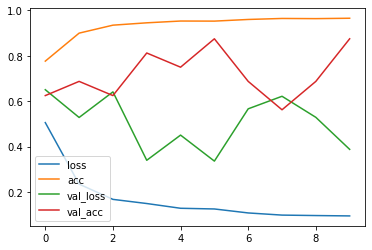

In [40]:
# ploting to check various factors

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(model.history.history).plot()
plt.show()

In [41]:
loss,acc=model.evaluate(x_test,y_test)
print(loss,acc)

624/624 [==============================] - 4s 6ms/sample - loss: 0.5643 - acc: 0.7708
0.5642557415920191 0.7708333
